#### Importar bibliotecas


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Function:

In [2]:
def F(x,E):
    aa =  ( E - 4*( 1/x**(12)- 1/x**(6)) )**(1/2)  
    return aa
def f(x,E):
    a = 4 - E*x**(12)- 4*x**(6)
    return a
def Limite_inf(x,h,E):
    x_inicial = x
    h_inicial = h
    i = 0
    while(h > 0.00001):
        a = f(x,E)
        if(abs(a)<0.00001 ):
            break
        x = x + h
        b = f(x,E)       
        if( a*b < 0 ):
            x = x-h
            h = h/2
        #cout<<"f(x,E):"<<f(x,E)<<" x "<<x<<" h ="<<h<<"\n";
        i =i+1
        #if(i>4000):   
        #    break
        #elif(i>2000):            
        #    h=h_inicial/2
        #    x = x_inicial
    return x+0.0005
def Limite_sup(x,h,E):
    x_inicial = x
    h_inicial = h
    i = 0
    while(h > 0.00000001):
        a = f(x,E)
        if(abs(a)<0.00000001 ):
            break
        x = x - h
        b = f(x,E)       
        if( a*b <0.00000001 ):
            x = x+h
            h = h/2
        #cout<<"f(x,E):"<<f(x,E)<<" x "<<x<<" h ="<<h<<"\n";
        i +=1
        if(i>4000):   
            break
        elif(i>2000):            
            h=h_inicial/2
            x = x_inicial
    return x - 0.0005
def Integral(N,h,E,a):
    # a is inferior limit of integral.
    # E is the Energi/Potential.
    # h is the interval between each step of the sum.
    # N is the number of steps of the sum.
    A = 0
    i = 0
    while (i < N):
        f_0 = F(a+i*h,E)
        i+=1
        f_1 = F(a+i*h,E)
        A = A +(h/2)*(f_0 + f_1) 
    return A


### Calculation

Parameters:

In [5]:
N     = 100               # Number of step.
gamma = [21.7,24.8,150]   # Molecule constant.
E     = [[-0.772298,-0.422291,-0.195127],[-0.798747,-0.477898,-0.254282 ],[-0.964499,-0.896565,-0.831552,-0.769658,-0.710729,-0.654748,-0.601654]] # Energy. 
n     = [0,1,2,3,4,5,6]   # Level of energy.

Loop, para encontrar os niveis de energia

In [ ]:

delta_E = 0.001     # Step of energy.
parametro = 1
Q = False
P = False
while(abs(parametro)>0.001):
    E = E + delta_E
    a = Limite_inf(1.0,0.01,E)
    b = Limite_sup(1.7,0.01,E)    
    h = (b-a)/N;                  
    parametro_0 = Integral(N,h,E,a)
    parametro_1 = (n + 0.5)*np.pi/gamma
    parametro = parametro_0 - parametro_1
    #print("Para a: ",a," e b: ",b," E : ",E,", obtemos = ",parametro)
    if( E > -0.1 ):
        break
    if(parametro > 0.001):
        E = E - 2*delta_E
        continue
    elif( (parametro>-0.001) and (P==False) ):
        delta_E = delta_E/2
        parametro = 1
        P = True
        continue
    elif( (parametro>- 0.01) and (Q==False) ):
        delta_E = delta_E/2
        parametro = 1
        Q = True
        continue
    elif(parametro<-0.000000000001):
        parametro = 1
    elif(np.isnan(parametro)):
        parametro = 1
        continue
print("Para a: ",a," e b: ",b," E : ",E,", obtemos = ",parametro)

### Plots

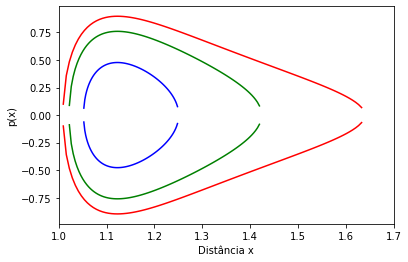

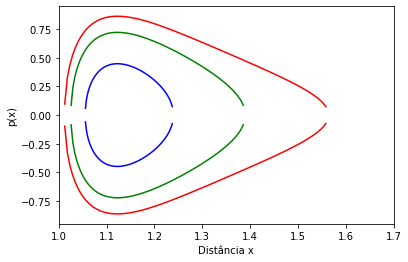

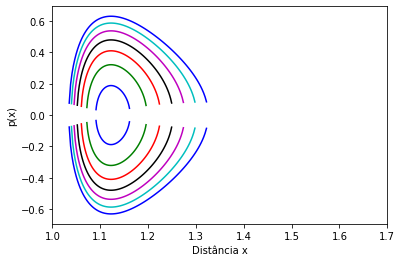

In [8]:
j   = 0
ii  = 0
iii = 0
color =['b','g','r','k','m','c','b']

while( ii <3  ):
    iii=0
    while( iii < len(E[ii][:]) ):
        I       = []
        I_T     = []
        varival = []

        a  = Limite_inf(1.0,0.01,E[ii][iii])
        b  = Limite_sup(1.7,0.01,E[ii][iii])    
        h  = (b-a)/N   
        
        j= 0 
        while(j<N):
            x = a+j*h
            fun = F(x,E[ii][iii])
            varival.append(x)
            I.append(fun)
            I_T.append(-fun)
            j+=1 
        I#.reverse()
        I_T#.reverse()
        plt.plot(varival,I,color[iii])
        plt.plot(varival,I_T,color[iii])
        iii+=1
    ii+=1
    plt.ylabel('p(x)')
    plt.xlabel('Distância x')
    #plt.xticks([])
    plt.xlim([1,1.7])
    plt.show()

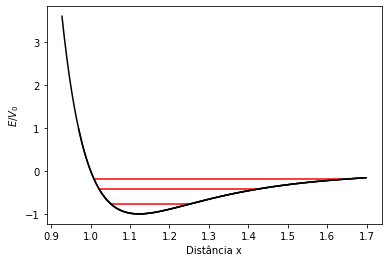

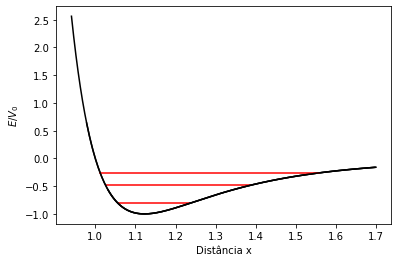

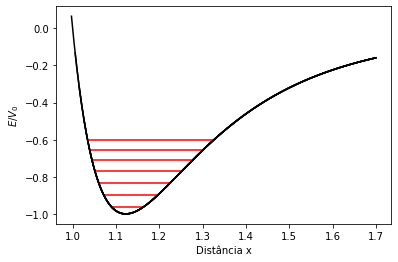

In [164]:
j   = 0
ii  = 0
iii = 0
color =['b','g','r','k','m','c','b']

while( ii <3  ):
    iii=0
    while( iii < len(E[ii][:]) ):
        x_plot  = []
        xv_plot  = []
        E_plot  = []
        varival = []

        a  = Limite_inf(1.0,0.01,E[ii][iii])
        b  = Limite_sup(1.7,0.01,E[ii][iii])    
        h  = (b-a)/N   
        
        j= 0 
        while(j<N):
            x = a+j*h
            x_plot.append(x)          # Para o potencial. 
            E_plot.append(E[ii][iii]) # Para o potencial.
            varival.append(x)
            j+=1
        
        #--------Potencial
        V_plot = []
        for x in np.arange(a -13*h,1.7,h):
            V = 4*( 1/x**(12)- 1/x**(6))
            V_plot.append(V)
            xv_plot.append(x)
            #x_plot.append(x)
            #E_plot.append(0)
        #--------------
        plt.plot(x_plot,E_plot,'r-')
        plt.plot(xv_plot,V_plot,'k')
        plt.ylabel('$E/V_{0}$')
        plt.xlabel('Distância x')
        #plt.xlim([1,1.7])
        
        iii+=1
    ii+=1
    plt.show()
